># ***The Sparks Foundation: TASK-4***

***-perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'***

***-As a Secruity/Defense analyst, try to find out the Hot zones of terrorism.***

***-What all secruity issues and insights can derive by EDA?***







**IMPORT ALL REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**READ THE CSV FILE**

In [ ]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin',low_memory=False)
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


**DATASET INFORMATION AND EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 5.2+ MB


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,5.096000e+03,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,5006.000000,5006.000000,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,745.000000,5096.000000,5096.000000,5096.0,5096.000000,14.000000,1.0,5095.000000,4851.000000,5078.000000,89.000000,74.000000,79.000000,5.000000,5.000000,5.000000,0.0,0.0,0.0,5095.000000,10.000000,0.0,5095.000000,1345.000000,797.000000,...,193.000000,6.000000,5.0,0.0,0.0,0.0,11.000000,5095.000000,4273.000000,199.000000,178.000000,9.000000,8.000000,1.0,1.0,4484.000000,1041.000000,1024.000000,3308.000000,1016.000000,962.000000,5095.000000,2172.000000,1.258000e+03,5001.000000,358.000000,358.000000,144.000000,141.000000,4911.000000,1.500000e+02,1.0,5.000000e+01,0.0,240.000000,177.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,1.973872e+11,1973.809066,6.158359,15.303375,0.030808,271.445840,5.754513,36.559454,-26.458558,1.098705,0.004710,0.998626,0.985675,0.897959,-1.026491,1.385235,0.070055,0.898940,0.0,3.132653,4.214286,2.0,6.636899,39.485879,180.961796,10.202247,53.797297,215.392405,5.400000,32.800000,187.400000,NaN,NaN,NaN,0.028067,0.600000,NaN,0.002944,-45.371747,-84.223338,...,4.533679,0.833333,2.0,NaN,NaN,NaN,0.454545,6.434151,12.117716,6.437186,11.320225,7.666667,14.250000,6.0,16.0,0.735950,0.170029,0.209961,1.107920,0.397638,0.020790,0.500098,3.286832,1.382100e+05,0.071586,-5.997207,0.248603,-1.013889,36.829787,0.030747,1.383369e+06,20000.0,1.966980e+06,NaN,2.816667,8.327684,-3.113052,-3.045535,0.494014,-1.288322
std,2.335571e+08,2.337862,3.293888,9.140459,0.172815,204.761573,3.378390,22.836022,51.475161,0.594603,0.068471,0.037041,0.118838,0.302732,3.106213,0.635464,0.255265,0.301437,0.0,1.922254,2.516975,NaN,5.759550,28.588044,75.480065,6.346402,25.504219,63.821349,5.319774,23.889328,51.140004,NaN,NaN,NaN,0.165180,0.516398,NaN,0.054185,52.029025,35.650492,...,2.861409,0.408248,0.0,NaN,NaN,NaN,0.522233,1.963630,7.030395,1.704072,7.537757,2.692582,10.416333,NaN,NaN,3.223387,1.118423,2.745984,8.868704,2.632004,0.217794,1.204767,0.483873,1.331834e+06,0.257826,48.154949,6.179589,14.997429,84.821153,0.172650,5.623556e+06,NaN,6.206763e+06,NaN,1.296815,30.232902,4.426756,4.488904,0.717657,3.985630
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-43.532054,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.0,1.000000,1.000000,5.000000,1.000000,1.000000,30.000000,1.000000,8.000000,110.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,2.0,NaN,NaN,NaN,0.000000,2.000000,1.000000,2.000000,2.000000,5.000000,2.000000,6.0,16.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.972051e+11,1972.000000,3.000000,7.000000,0.000000,98.000000,1.000000,35.800916,-73.931351,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,2.000000,2.0,2.000000,15.000000,104.500000,3.000000,25.000000,217.000000,2.000000,18.000000,161.000

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999901,-0.063184,-0.006704,-0.015385,-0.082134,0.342768,0.032176,0.314601,0.020734,-0.021270,-0.021037,-0.028332,0.055115,-0.147355,-0.126205,-0.114037,0.099446,NaN,-0.094010,-0.040591,NaN,0.046156,0.040720,-0.188227,0.147713,0.173286,-0.015260,0.023034,-0.018775,0.191009,NaN,NaN,NaN,-0.127183,1.634235e-02,NaN,0.003142,0.443579,0.094856,...,0.025567,1.000000,NaN,NaN,NaN,NaN,0.405385,-0.035086,-0.183632,-0.167328,0.079246,-0.467506,-0.035592,NaN,NaN,0.019185,0.043776,0.069075,0.019208,0.008654,0.093752,0.123641,0.143717,0.010396,-0.013492,-0.060446,0.043712,0.044992,0.171972,-0.008400,0.080359,NaN,0.019454,NaN,0.124128,-0.162417,0.105198,0.099172,0.032696,0.168985
iyear,0.999901,1.000000,-0.077225,-0.007594,-0.015557,-0.082917,0.341791,0.032176,0.313578,0.020902,-0.021356,-0.021161,-0.028214,0.055107,-0.147591,-0.125761,-0.114399,0.099336,NaN,-0.092980,-0.031519,NaN,0.046214,0.040783,-0.187898,0.147880,0.173872,-0.013720,0.019574,-0.023974,0.195476,NaN,NaN,NaN,-0.126899,2.388820e-17,NaN,0.002903,0.443521,0.095572,...,0.025599,1.000000,NaN,NaN,NaN,NaN,0.385758,-0.034310,-0.182528,-0.167052,0.080492,-0.479463,-0.046374,NaN,NaN,0.018743,0.043046,0.068193,0.018709,0.008094,0.093820,0.123591,0.144335,0.010194,-0.013464,-0.059495,0.043550,0.048293,0.170305,-0.008097,0.079144,NaN,0.014711,NaN,0.122895,-0.162613,0.103799,0.097833,0.031496,0.167055
imonth,-0.063184,-0.077225,1.000000,0.035738,0.012805,0.059647,0.044942,-0.002478,0.049960,-0.013995,0.005395,0.009827,-0.006237,-0.003081,0.027420,-0.021594,0.032789,0.001889,NaN,-0.064912,-0.339848,NaN,-0.008198,-0.007953,-0.011657,-0.038697,-0.067511,-0.105851,0.282201,0.439892,-0.423324,NaN,NaN,NaN,-0.012130,7.000656e-01,NaN,0.014987,0.057132,-0.019361,...,-0.000817,1.000000,NaN,NaN,NaN,NaN,0.759041,-0.049617,-0.065983,-0.009748,-0.076009,0.587011,0.539142,NaN,NaN,0.030277,0.060524,0.073350,0.038198,0.043684,0.005392,-0.005198,-0.045234,0.015087,-0.001159,-0.058015,0.005069,-0.204249,0.105429,-0.021465,0.078028,NaN,0.275073,NaN,0.074330,0.020178,0.091475,0.087668,0.081944,0.124854
iday,-0.006704,-0.007594,0.035738,1.000000,0.012098,0.032435,-0.005863,-0.016752,0.001796,0.004565,0.016533,0.016883,-0.002684,0.003387,-0.004736,-0.038501,0.021677,-0.026055,NaN,-0.064645,0.103645,NaN,0.031387,0.025266,0.014206,-0.129453,-0.076207,-0.059883,-0.628432,-0.655067,-0.714653,NaN,NaN,NaN,-0.001166,-4.608882e-01,NaN,-0.014473,-0.028664,-0.034848,...,0.151753,-0.242065,NaN,NaN,NaN,NaN,-0.673364,-0.031020,-0.029535,0.044206,-0.014984,0.168826,-0.019256,NaN,NaN,0.003706,-0.006408,0.029351,-0.014792,-0.018175,0.009633,-0.002347,-0.016307,0.009629,-0.007632,0.012071,0.053388,-0.119674,-0.050046,0.000394,0.034757,NaN,0.029556,NaN,0.115033,-0.080317,0.023219,0.021814,0.030041,0.036527
extended,-0.015385,-0.015557,0.012805,0.012098,1.000000,-0.141626,-0.002844,-0.182776,0.010471,0.130845,0.004322,0.006612,0.021494,0.033841,-0.017492,-0.059081,-0.017791,0.056012,NaN,0.229935,0.318550,NaN,-0.045949,-0.043055,-0.002849,0.025833,0.040517,-0.213665,NaN,NaN,NaN,NaN,NaN,NaN,-0.023424,NaN,NaN,0.011273,0.274511,0.087734,...,0.176692,NaN,NaN,NaN,NaN,NaN,-0.559017,0.432579,-0.100982,0.002470,0.005835,0.046424,0.339422,NaN,NaN,-0.011801,0.197

In [ ]:
df.isnull() .sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    5080
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       4737
Length: 135, dtype: int64

In [ ]:
df.duplicated() .sum()

0

In [ ]:
df.shape

(5096, 135)

**USING HISTOGRAM TO REPRESENT RELATIONSHIP BETWEEN ALL FEATURES**

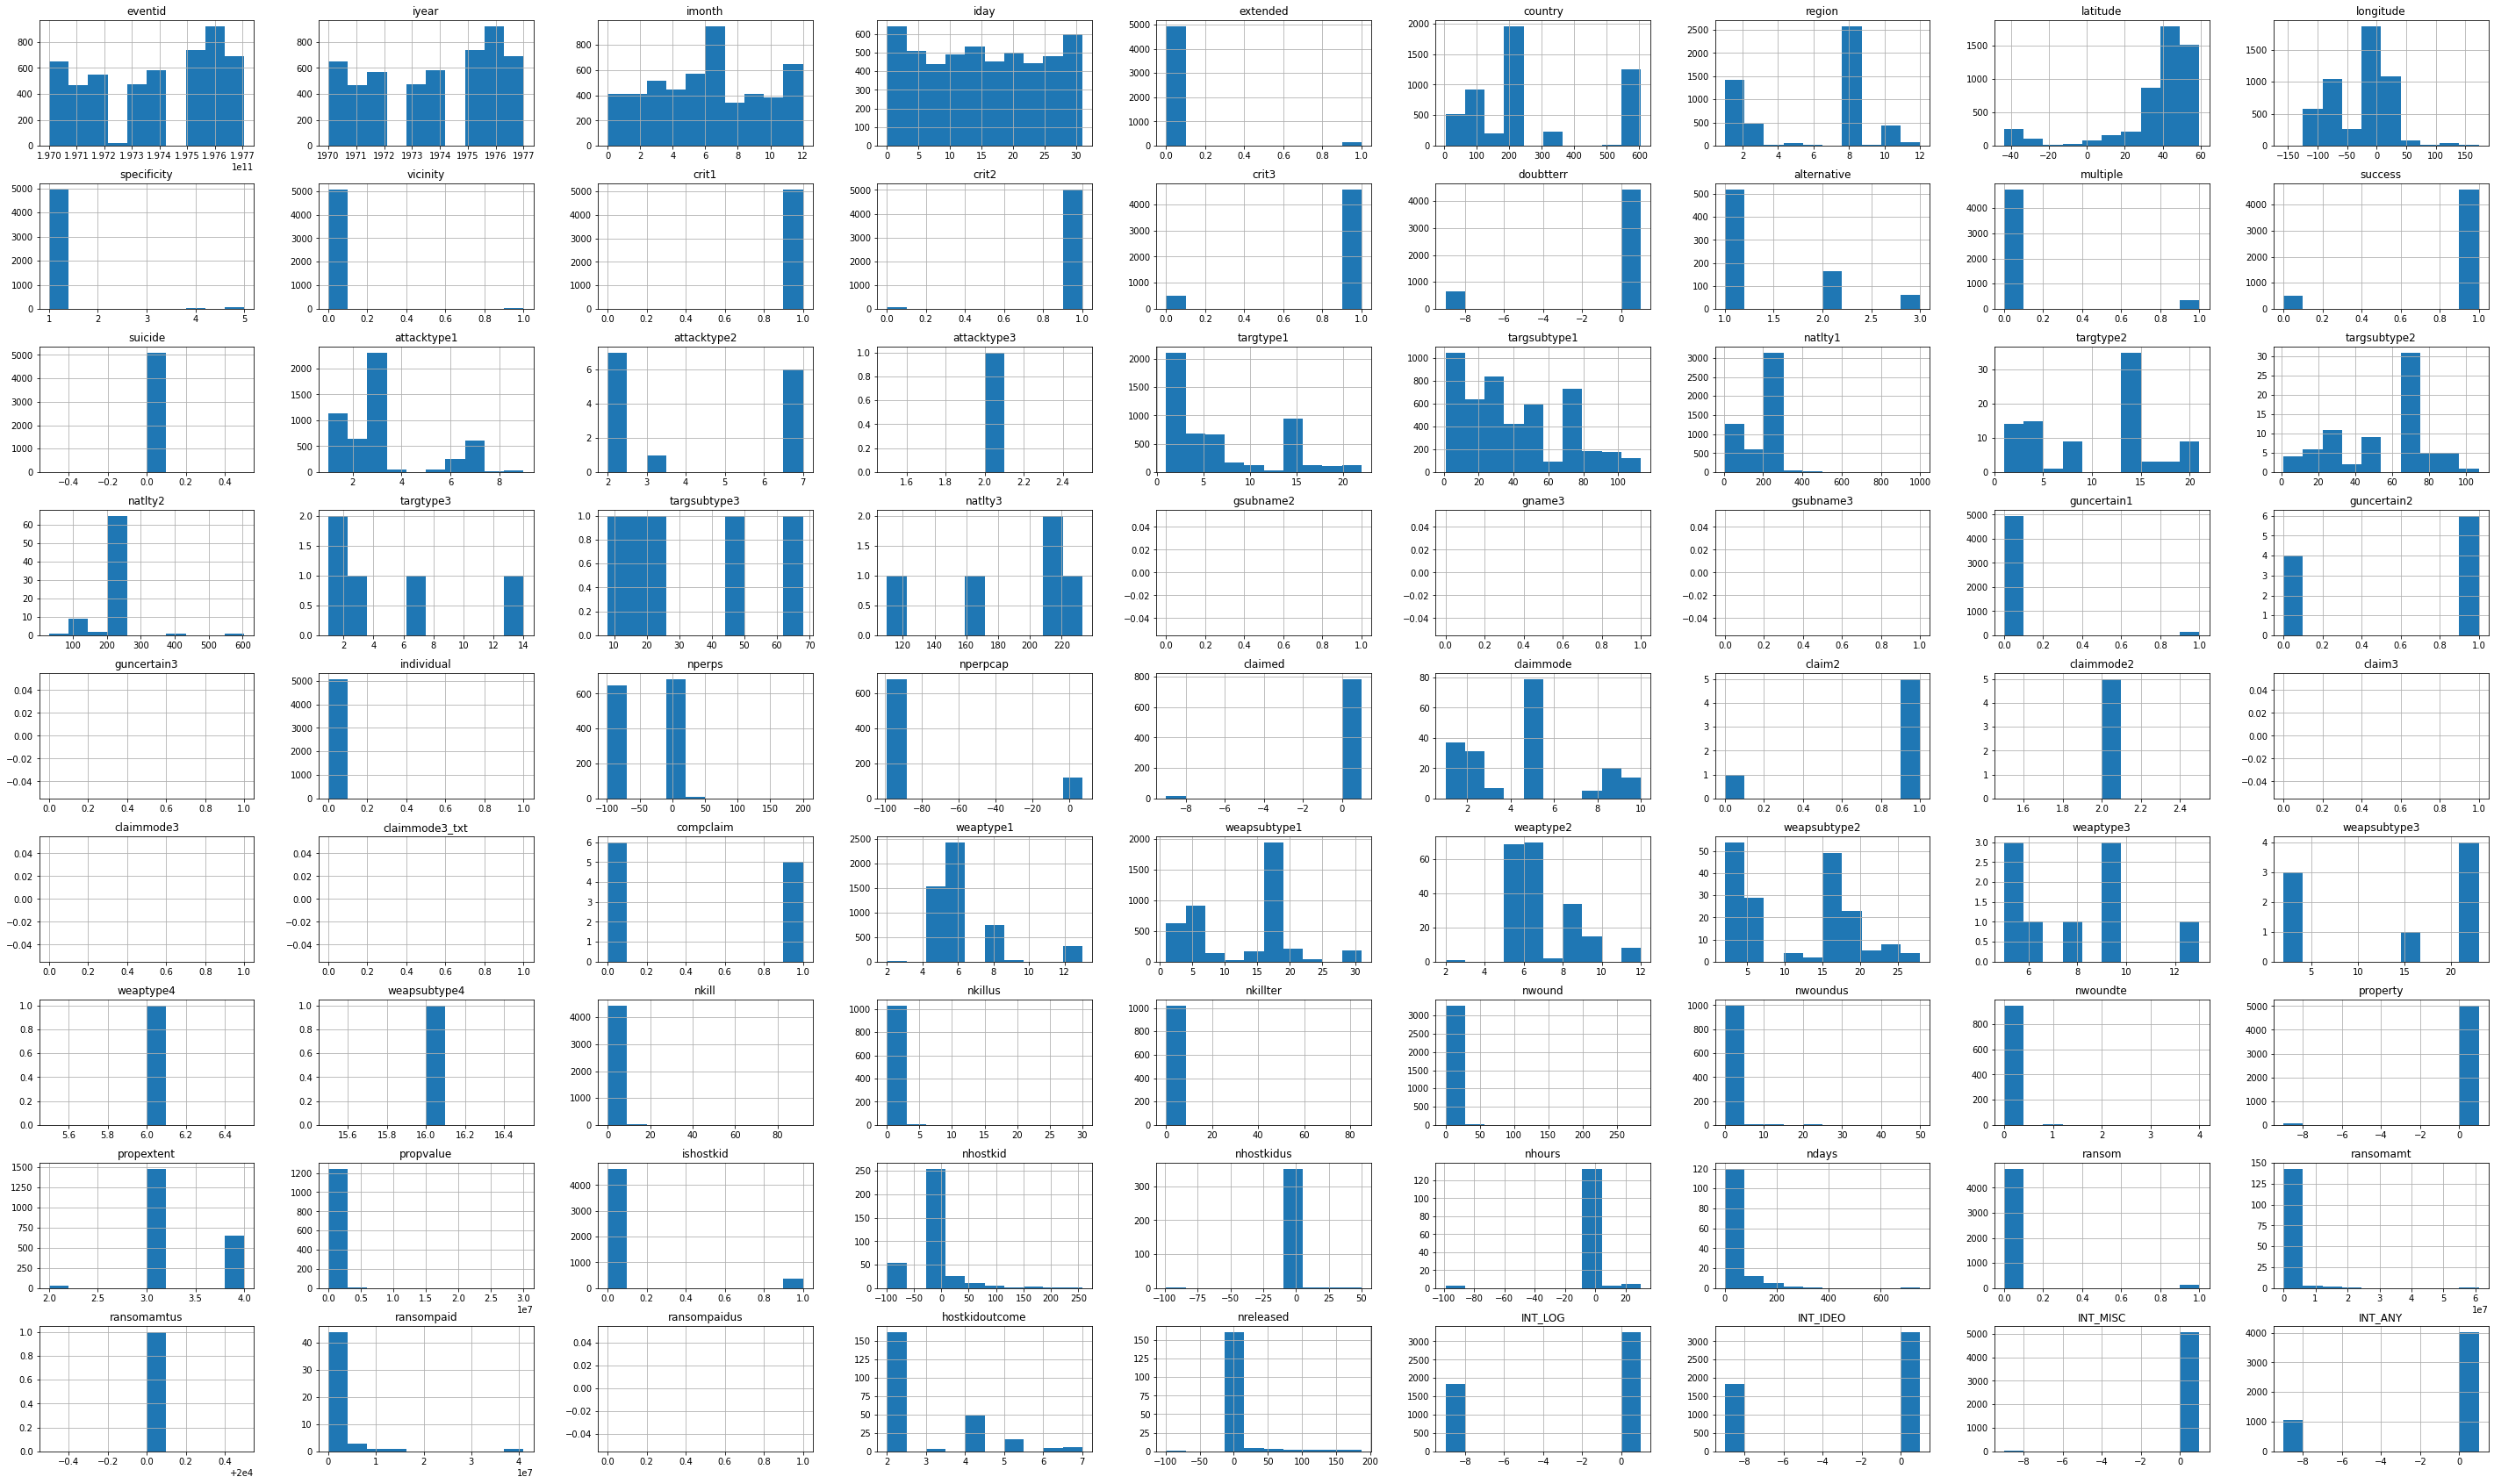

In [ ]:
df.hist(figsize=(50,30))
plt.show()

**COUNTRIES AFFECTED BY TERRORIST ATTACKS**

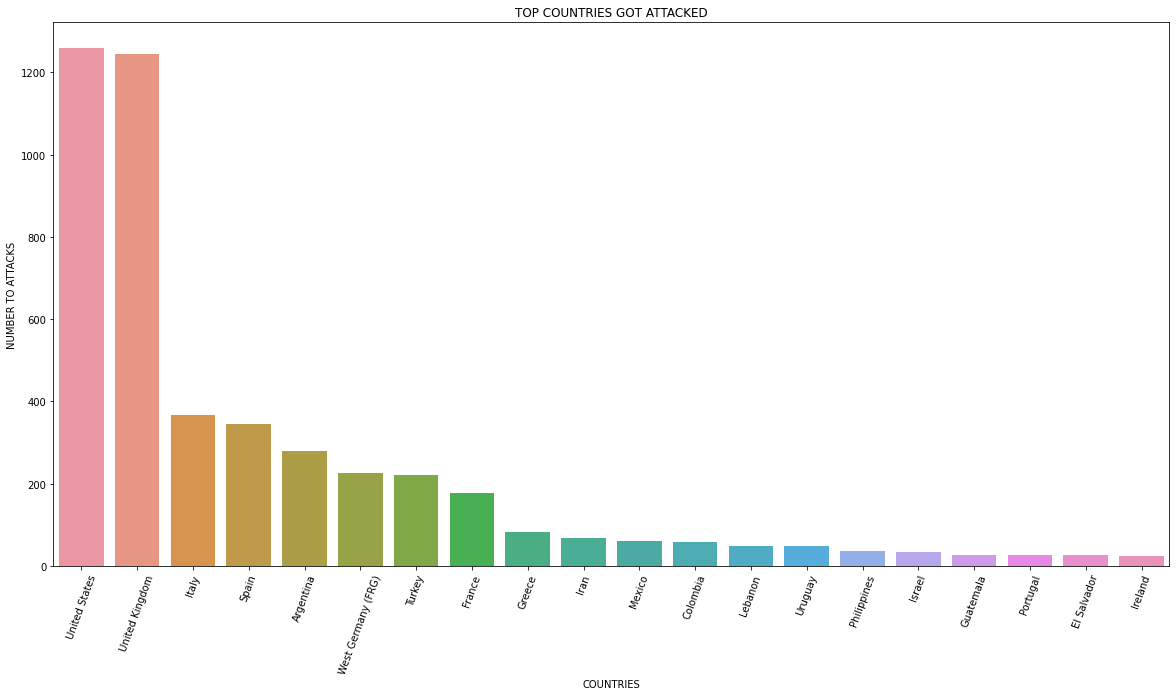

In [ ]:
df['country'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=df['country_txt'].value_counts()[:20].index,y=df['country_txt'].value_counts()[:20].values)
plt.title('TOP COUNTRIES GOT ATTACKED')
plt.xticks(rotation=70)
plt.xlabel('COUNTRIES')
plt.ylabel('NUMBER TO ATTACKS')
plt.show()

**REGION AFFECTED BY TERRORIST ATTACKS**

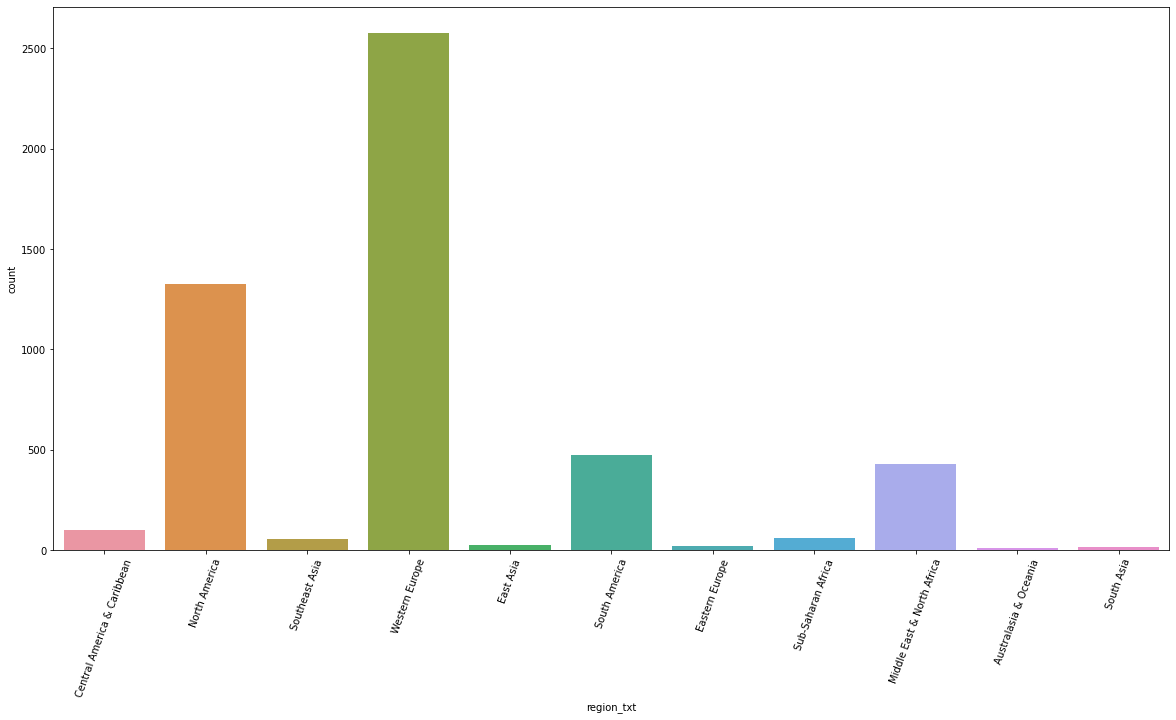

In [ ]:
df['region_txt'].value_counts()
plt.figure(figsize=(20,10))
sns.countplot(x='region_txt',data=df)
plt.xticks(rotation=70)
plt.show()


In [ ]:
df['city'].value_counts()

Belfast          637
New York City    282
Buenos Aires     163
Rome             132
Unknown          118
                ... 
Zarate             1
Gaza               1
Porto Alegre       1
Louisville         1
Folcroft           1
Name: city, Length: 1009, dtype: int64

**NUMBER OF ATTACKS FROM 1970 TO 1977**


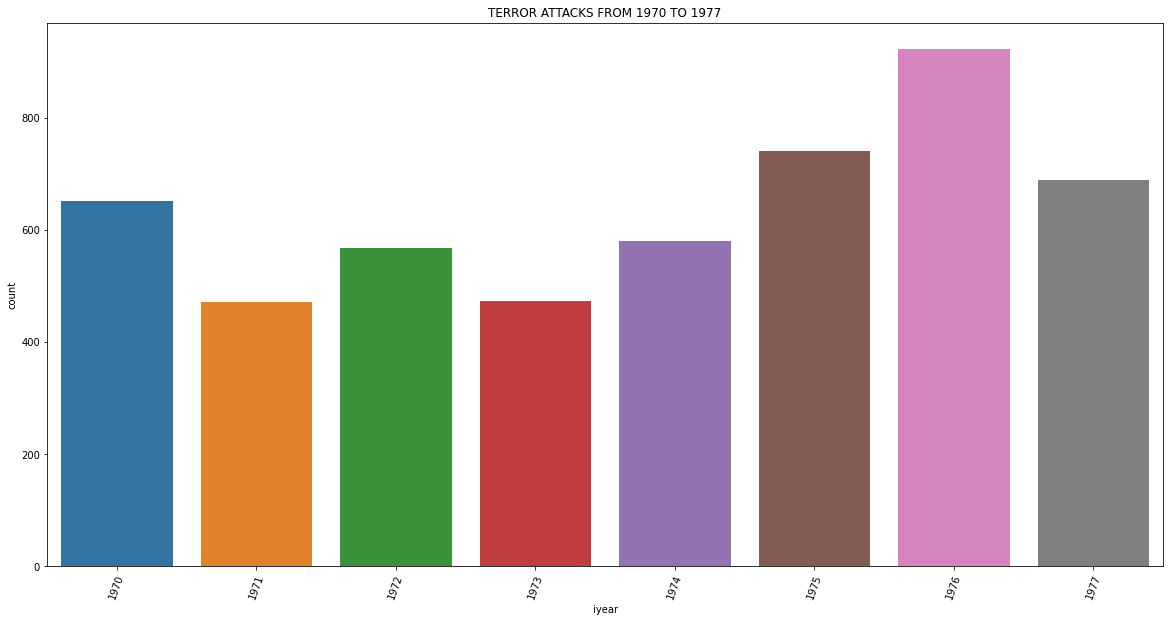

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(x='iyear',data=df,palette='tab10')
plt.xticks(rotation=70)
plt.title('TERROR ATTACKS FROM 1970 TO 1977')
plt.show()

**TYPES OF ATTACKS USED BY TERRORISTS**

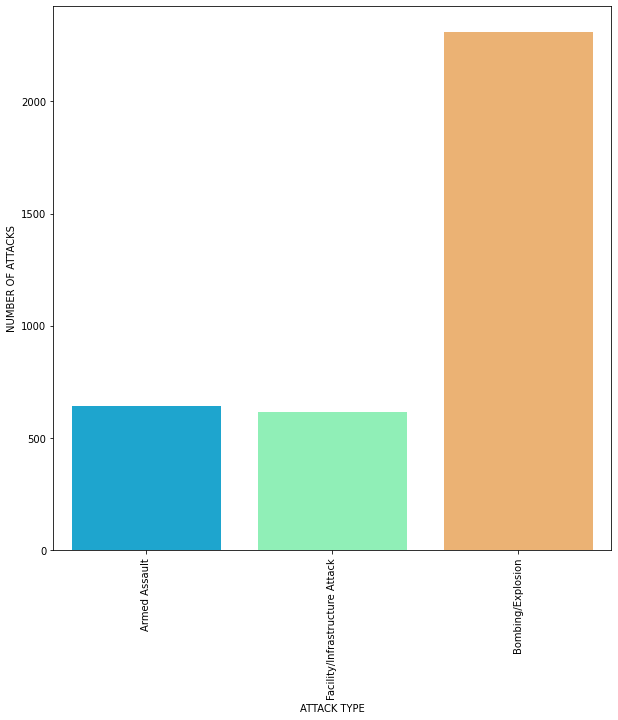

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['attacktype1_txt'],order=df['attacktype2_txt'].value_counts().index,palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('ATTACK TYPE')
plt.ylabel('NUMBER OF ATTACKS')
plt.show()

**ATTACK TARGET**

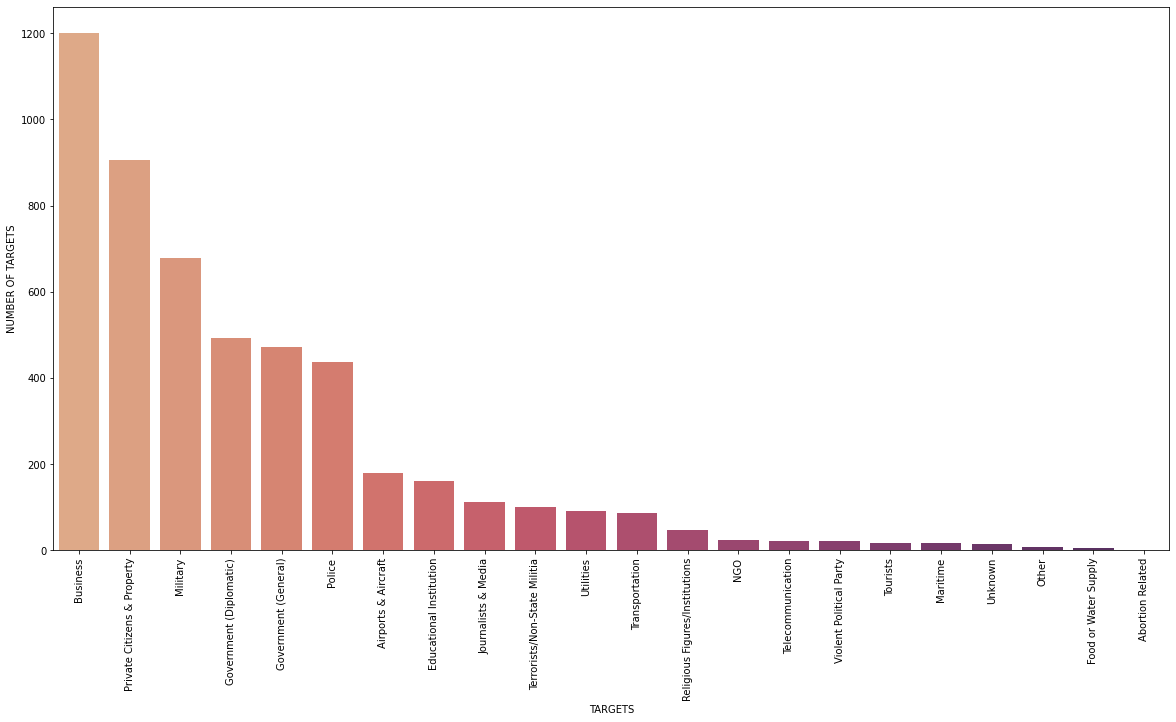

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['targtype1_txt'],order=df['targtype1_txt'].value_counts().index,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('TARGETS')
plt.ylabel('NUMBER OF TARGETS')
plt.show()

**NAME OF GROUP ATTACKS TERRORIST**

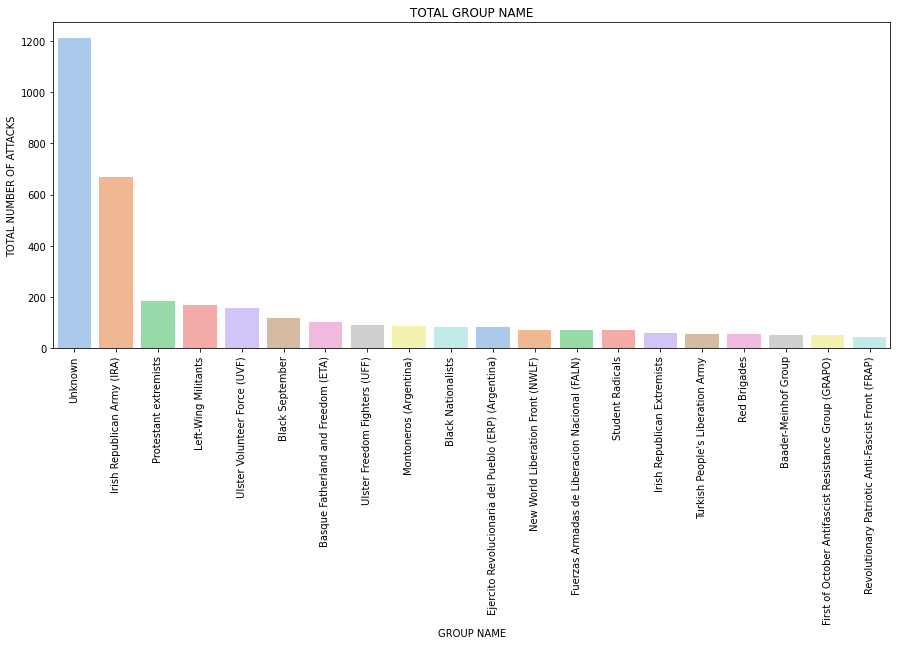

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['gname'].value_counts()[:20].index,y=df['gname'].value_counts()[:20].values,palette='pastel')
plt.xticks(rotation=90)
plt.title('TOTAL GROUP NAME')
plt.xlabel('GROUP NAME')
plt.ylabel('TOTAL NUMBER OF ATTACKS')
plt.show()

**CITIES AFFECTED BY TERRORIST**

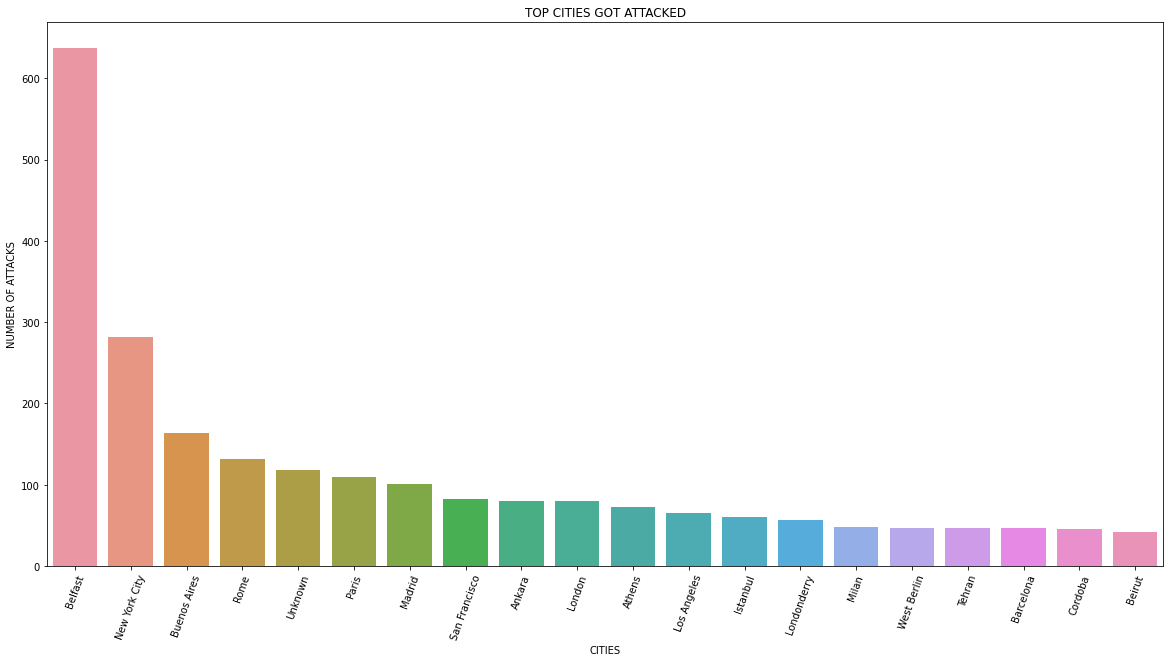

In [ ]:
df['city'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=df['city'].value_counts()[:20].index,y=df['city'].value_counts()[:20].values)
plt.xticks(rotation=70)
plt.title('TOP CITIES GOT ATTACKED')
plt.xlabel('CITIES')
plt.ylabel('NUMBER OF ATTACKS')
plt.show()

**WEAPONS USED FOR SUPPORTING THE ATTACK TYPE VISUAL**

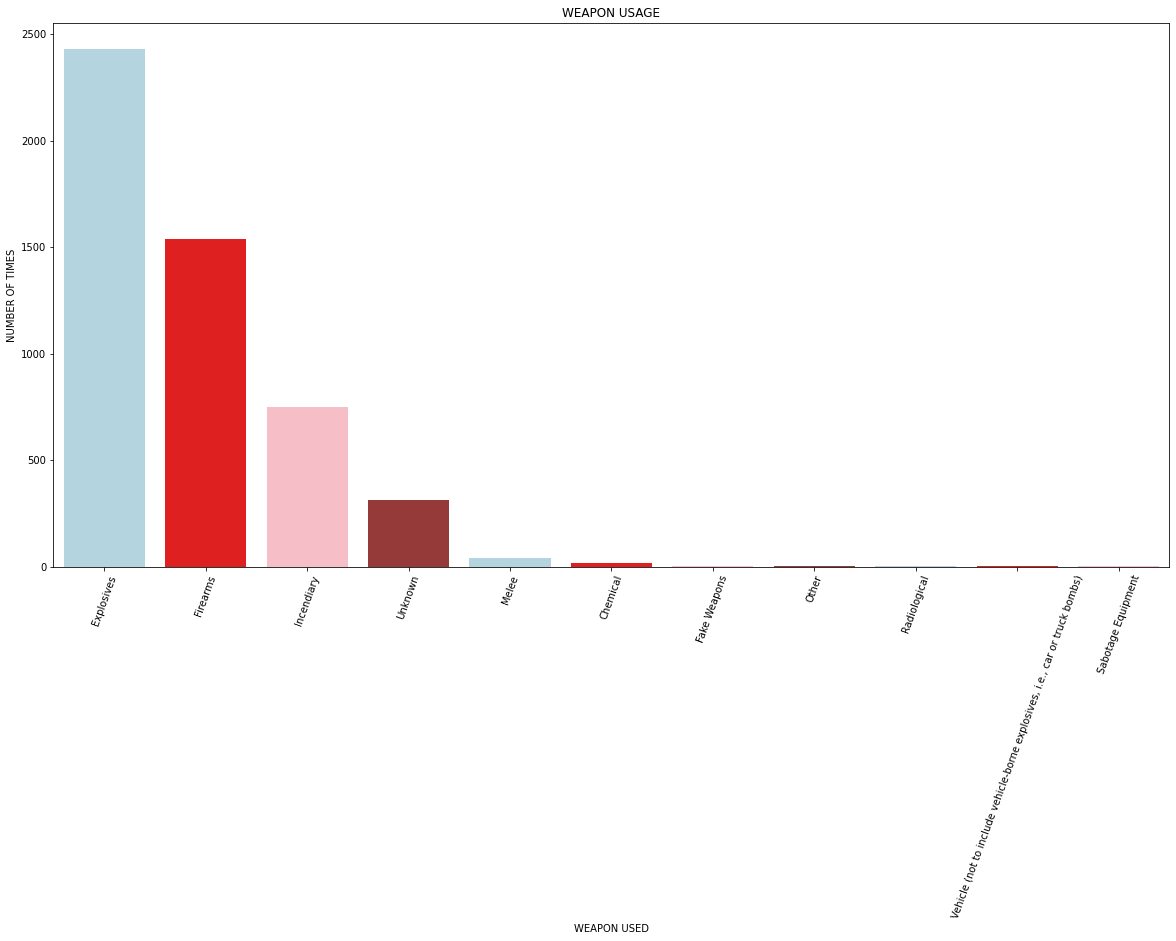

In [ ]:
df['weaptype1_txt'].value_counts()
plt.figure(figsize=(20,10))
color=['lightblue','red','lightpink','brown']
sns.barplot(x=df['weaptype1_txt'].value_counts()[:20].index,y=df['weaptype1_txt'].value_counts()[:20].values,palette=color)
plt.xticks(rotation=70)
plt.title('WEAPON USAGE')
plt.xlabel('WEAPON USED')
plt.ylabel('NUMBER OF TIMES')
plt.show()

# **OBSERVATIONS**
- UNITED STATES and UNITED KINGDOM are most attacked countries.
- WESTERN EUROPE and NORTH AMERICA are most attacked region.
- There was growth in terrorist attack from 1973 to 1976.
- EXPLOSIVES are most used weapon & type b attack used by terrorist.
- BUSINESS and PRIVATE CITIZEN & PROPERTY were most targeted during terrorist attack.
- Most number of attacks were done by UNKNOWN group or not an group terrorist.
- BELLFAST and NEWYORK CITY are the most attacked cities.
# - ***THANK YOU..!!***
# - SHYAM SHARMA (sgsits indore)

